In [1]:
import numpy as np
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# The Anscombe Quartet

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [17]:
df = sns.load_dataset("anscombe")

In [18]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [20]:
mask = df.dataset == 'I'
# df['dataset'].isin(['I'])
df.loc[mask, :]

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [28]:
df.query('dataset == "III"')

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


In [24]:
df.mean()

x    9.000000
y    7.500682
dtype: float64

In [25]:
df.std()

x    3.198837
y    1.958925
dtype: float64

In [29]:
df.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [30]:
df.groupby('dataset').std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [31]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

In [32]:
df = pd.DataFrame({'x1': x1,'y1': y1,
                   'x2': x2,'y2': y2,
                   'x3': x3,'y3': y3,
                   'x4': x4,'y4': y4})

In [33]:
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [34]:
df.mean()

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

In [35]:
df.std()

x1    3.316625
y1    2.031568
x2    3.316625
y2    2.031657
x3    3.316625
y3    2.030424
x4    3.316625
y4    2.030579
dtype: float64

In [36]:
import matplotlib.pyplot as plt

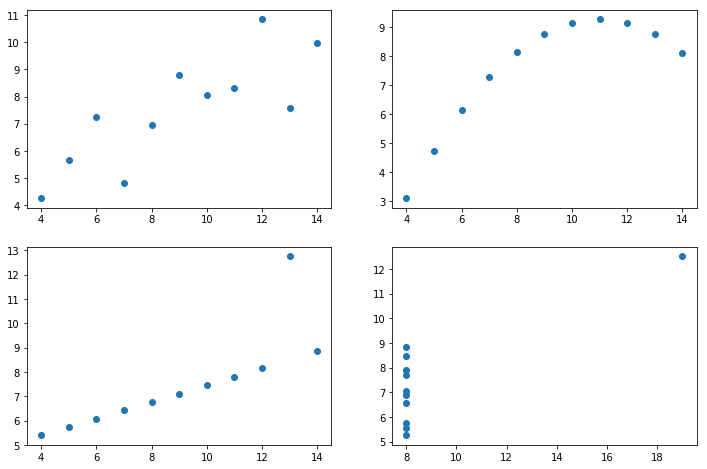

In [37]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes[0][0].scatter(df.x1, df.y1)
axes[0][1].scatter(df.x2, df.y2)
axes[1][0].scatter(df.x3, df.y3)
axes[1][1].scatter(df.x4, df.y4)

Anscombe (...) intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."

# The Basics of matplotlib

## Parts of a figure

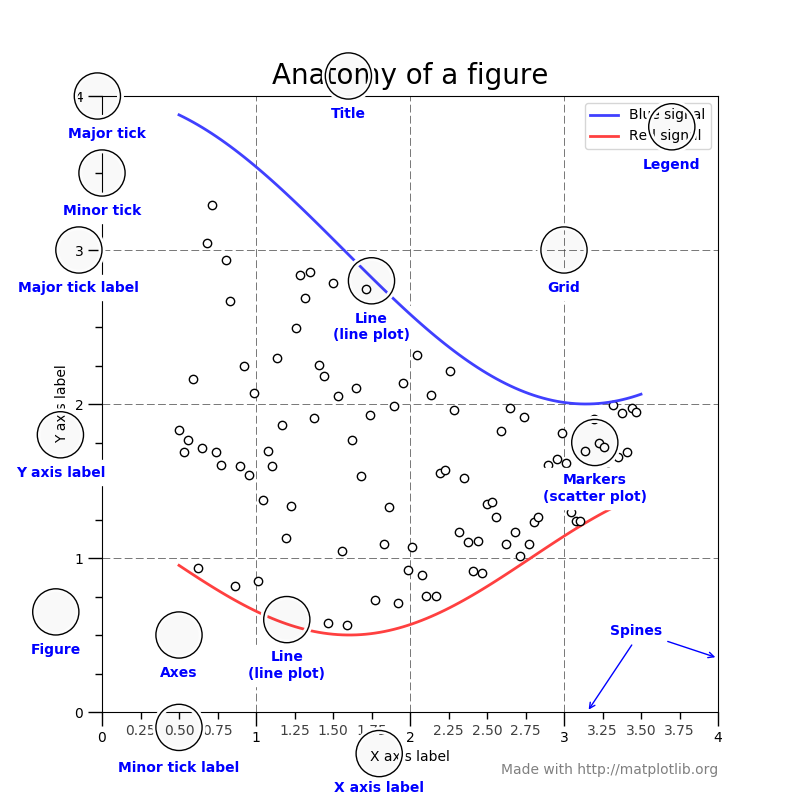

## Terminology

1. **Matplotlib** graphs your data on **Figures**. 

2. Each **Figure** can contain one ore more **Axes**


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fa5ab9c588>)

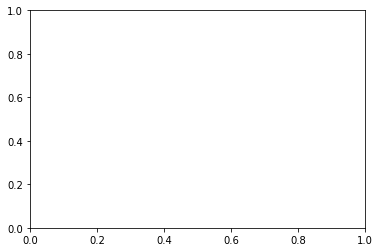

In [39]:
plt.subplots()

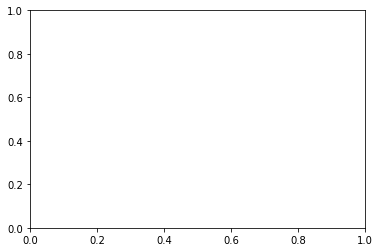

In [44]:
# Create a figure containing a single axes.
fig, ax = plt.subplots()

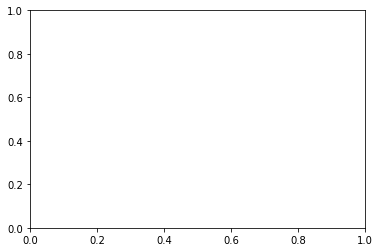

In [45]:
fig

In [46]:
ax

In [ ]:
ax.plot()

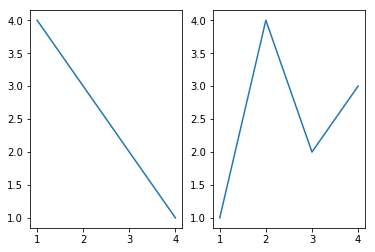

In [56]:
fig, ax = plt.subplots(1, 2)
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

ax[0].plot([1,2,3,4], [4,3,2,1])

In [53]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA5AD8D240>,
      dtype=object)

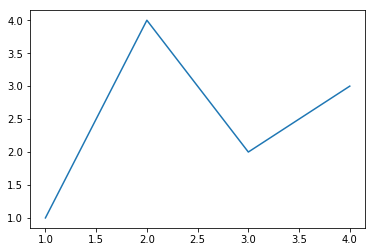

In [47]:
# Create a figure containing a single axes.
fig, ax = plt.subplots()

# Plot some data on the axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);

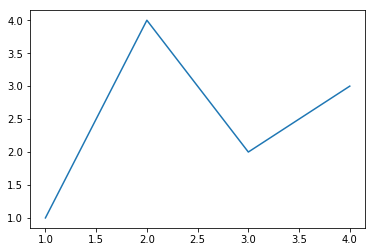

In [51]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

In [ ]:
# fig is the figure itself.
fig

In [ ]:
# axes is the object
ax

## The pyplot (plt) method.

> The plt.plot method connects the dots by a line, by default.

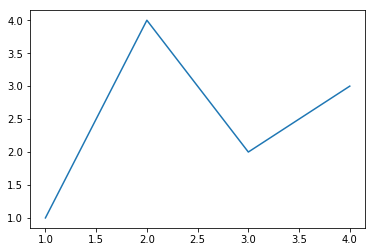

In [59]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])

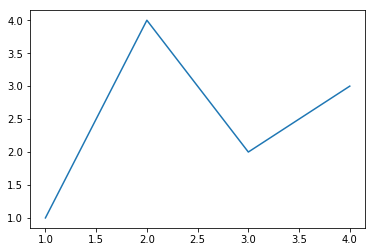

In [60]:
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]
plt.plot(x, y)

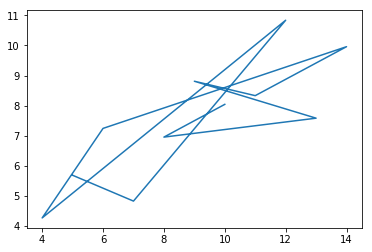

In [63]:
plt.plot(df['x1'], df['y1'])

# Basic Plots

## The `plt` command

We use pyplot to plot a simple straight line.

* The first argument is a list of x coordinates
* The second argument is a list of y coordinates

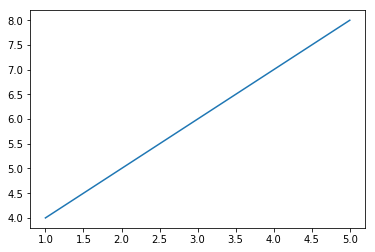

In [66]:
plt.plot([1,2,3,4,5], [4,5,6,7,8]);

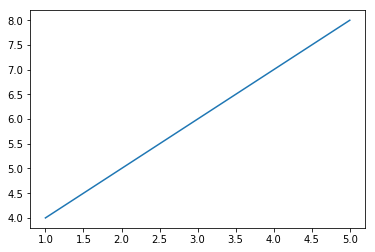

In [69]:
plt.plot([1,2,3,4,5], [4,5,6,7,8])
plt.show()

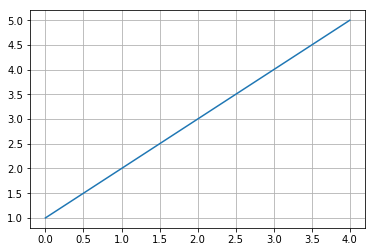

In [71]:
plt.plot([1,2,3,4,5])
# plt.plot([0,1,2,3,4], [1,2,3,4,5])
plt.grid()
plt.show()

In [75]:
import numpy as np

x1 = np.arange(0,5,.25)
x1

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75])

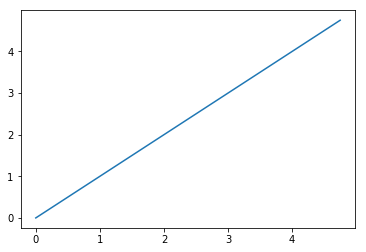

In [88]:
plt.plot(x1, x1)

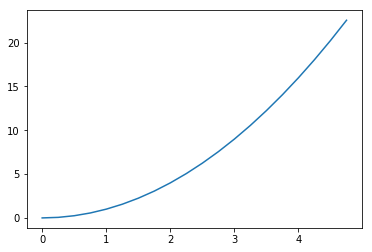

In [89]:
plt.plot(x1, x1**2)

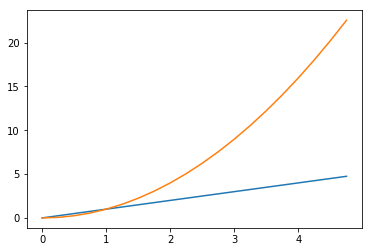

In [91]:
x = plt.plot(x1, x1)
y = plt.plot(x1, x1**2)

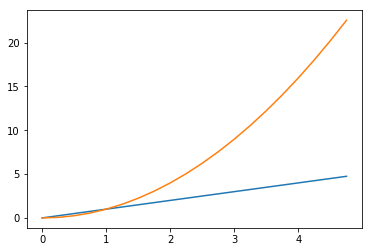

In [85]:
plt.plot(x1, x1)
plt.plot(x1, x1**2)
plt.show()

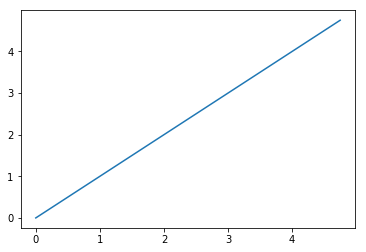

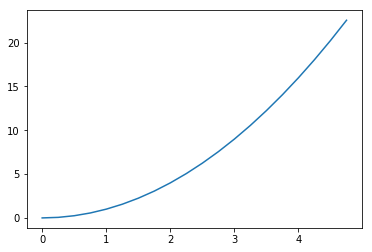

In [99]:
plt.plot(x1, x1)
plt.show()
plt.plot(x1, x1**2)
plt.show()

In [100]:
#ds = ['I','II','III','IV']
#
#for item in ds:
#    x = df.loc[df['dataset'] == item, ['x']]
#    y = df.loc[df['dataset'] == item, ['y']]
#    
#    plt.scatter(x,y)

# Matplotlib Arguments

In [101]:
import numpy as np

x = np.arange(-np.pi, np.pi, 0.01)
x

array([-3.14159265e+00, -3.13159265e+00, -3.12159265e+00, -3.11159265e+00,
       -3.10159265e+00, -3.09159265e+00, -3.08159265e+00, -3.07159265e+00,
       -3.06159265e+00, -3.05159265e+00, -3.04159265e+00, -3.03159265e+00,
       -3.02159265e+00, -3.01159265e+00, -3.00159265e+00, -2.99159265e+00,
       -2.98159265e+00, -2.97159265e+00, -2.96159265e+00, -2.95159265e+00,
       -2.94159265e+00, -2.93159265e+00, -2.92159265e+00, -2.91159265e+00,
       -2.90159265e+00, -2.89159265e+00, -2.88159265e+00, -2.87159265e+00,
       -2.86159265e+00, -2.85159265e+00, -2.84159265e+00, -2.83159265e+00,
       -2.82159265e+00, -2.81159265e+00, -2.80159265e+00, -2.79159265e+00,
       -2.78159265e+00, -2.77159265e+00, -2.76159265e+00, -2.75159265e+00,
       -2.74159265e+00, -2.73159265e+00, -2.72159265e+00, -2.71159265e+00,
       -2.70159265e+00, -2.69159265e+00, -2.68159265e+00, -2.67159265e+00,
       -2.66159265e+00, -2.65159265e+00, -2.64159265e+00, -2.63159265e+00,
       -2.62159265e+00, -

In [30]:
x = np.arange(-np.pi, np.pi, 0.01)
y = np.cos(x)
z = np.sin(x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

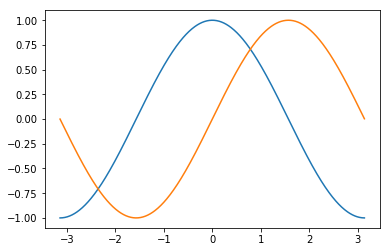

In [103]:
plt.plot(x, y)
plt.plot(x, z)
plt.show()

### Legends and labels

The label argument specify which will be the name of the legend for that specific curve.

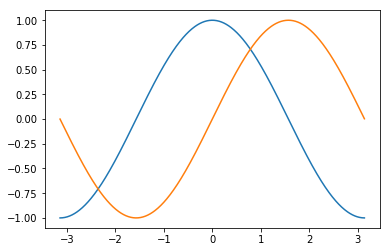

In [104]:
plt.plot(x, y, label='cosine')
plt.plot(x, z, label='sine')

plt.show()

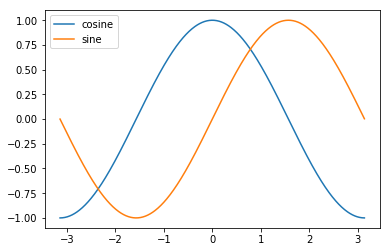

In [107]:
plt.plot(x, y, label='cosine')
plt.plot(x, z, label='sine')

plt.legend()
plt.show()

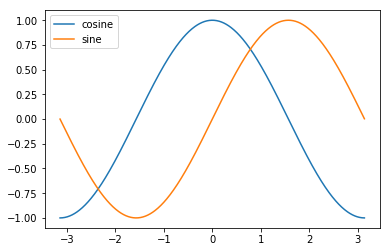

In [109]:
plt.plot(x, y)
plt.plot(x, z)

plt.legend(['cosine','sine'])
plt.show()

#### Legend

`plt` has several embued methods to allow the user to change specific layouts. For instance, if one wants to make the legend visible, it should write `plt.legend()`.

No handles with labels found to put in legend.


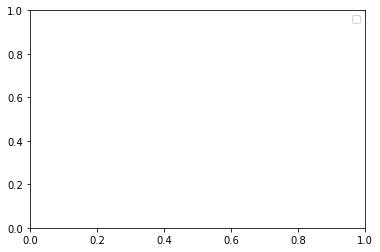

In [110]:
plt.legend()

What happened here? As soon as the previous plot appeared, the `plt` object has thrown away its contents. So, in this case, if one wants to make the legend appears, it has to be in the same cell as the plot.

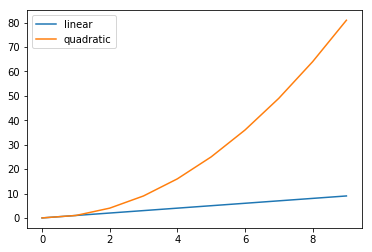

In [111]:
x1 = np.arange(0,10,1)

plt.plot(x1, x1, label='linear')
plt.plot(x1, x1**2, label='quadratic')
plt.legend()

_hint: note what the last piece of code is returning for us, in this case a Legend object. If you want to hide it, you can specify a ; at the end of the plt.legend() piece of code._ 

#### Label

For instance, if one wants to change the name of the x-axis, it should set the `plt.xlabel` method. Same for the `ylabel` and `title` methods.

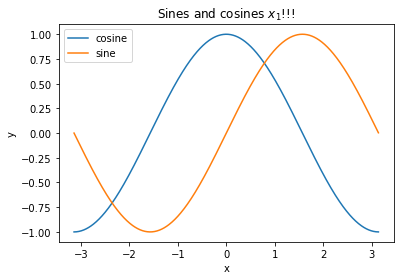

In [112]:
plt.plot(x, y)
plt.plot(x, z)

plt.legend(['cosine','sine'])

plt.title('Sines and cosines $x_1$!!!')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

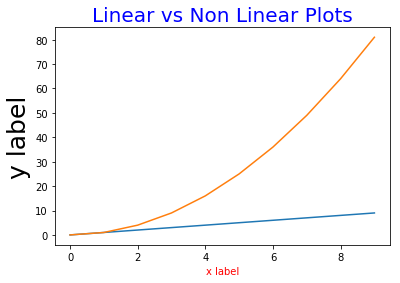

In [116]:
x1 = np.arange(0,10,1)

plt.plot(x1, x1, label='linear')
plt.plot(x1, x1**2, label='quadratic')
plt.xlabel('x label', color='red')
plt.ylabel('y label', fontsize=25)
plt.title("Linear vs Non Linear Plots", fontsize=20, color='blue')
plt.show()
# label color

#### Label params

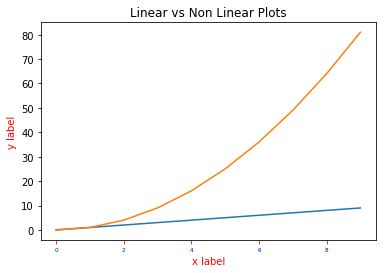

In [120]:
x1 = np.arange(0,10,1)

plt.plot(x1, x1, label='linear')
plt.plot(x1, x1**2, label='quadratic')
plt.xlabel('x label', color='red')
plt.ylabel('y label', color='red')
plt.title("Linear vs Non Linear Plots")

plt.tick_params(axis='x',
                color='red',
                labelcolor='blue',
                labelsize='xx-small')

# xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None

# Review Matplotlib.pyplot 

In [1]:
x = [21,41,68,230, 340]
x

[21, 41, 68, 230, 340]

In [3]:
y = [3, 5, 6, 87, 9]
y

[3, 5, 6, 87, 9]

In [4]:
import matplotlib.pyplot as plt

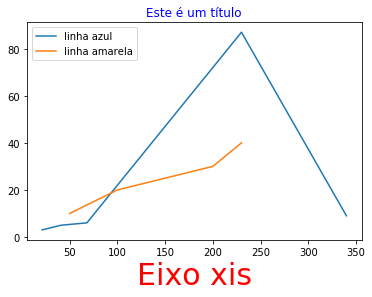

In [26]:
plt.plot(x, y, label='linha azul');
plt.plot([50, 100, 200, 230], [10, 20 , 30 , 40], label='linha amarela')

plt.xlabel('Eixo xis', color='red', fontsize=30)
plt.title('Este é um título', color='blue')
plt.legend()

plt.show()

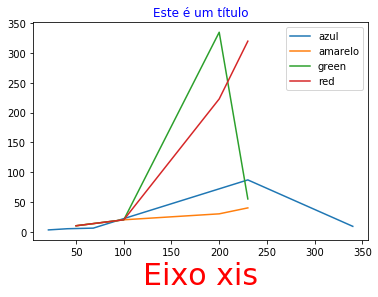

In [29]:
plt.plot(x, y);
plt.plot([50, 100, 200, 230], [10, 20 , 30 , 40])
plt.plot([50, 100, 200, 230], [10, 20 , 335 , 55])
plt.plot([50, 100, 200, 230], [10, 20 , 223 , 320])

plt.xlabel('Eixo xis', color='red', fontsize=30)
plt.title('Este é um título', color='blue')

plt.legend(['azul','amarelo','green','red'])
plt.show()

## Colors, linewidths and markers

### Formats for lines and markers
Line formats: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html <br />
Marker formats: https://matplotlib.org/1.4.1/api/markers_api.html <br />

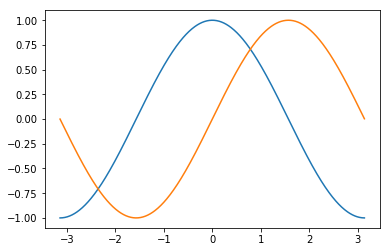

In [31]:
# c or color
# lw or linewidth
# ls or linestyle
plt.plot(x, y)
plt.plot(x, z)

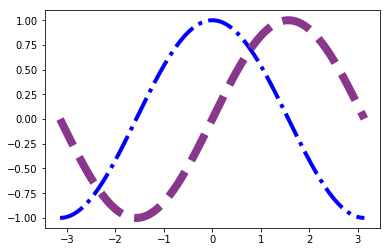

In [39]:
# c or color
# lw or linewidth
# ls or linestyle

plt.plot(x, y, c='blue', lw=4, ls='-.')
#plt.plot(x, z, color=(0.9,0,0), linewidth=8, linestyle='--')
plt.plot(x, z, color='#88378c', linewidth=8, linestyle='--')

## Setting ticks

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

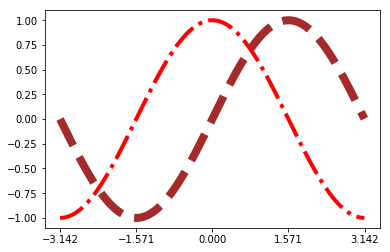

In [40]:
plt.plot(x, y, c='red', lw=4, ls='-.')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--')
plt.xticks(np.arange(-np.pi, np.pi+1, np.pi/2))
plt.show()

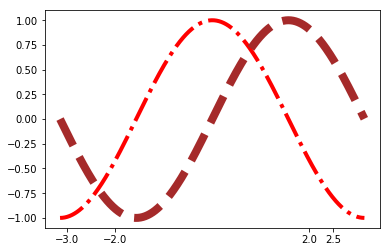

In [41]:
plt.plot(x, y, c='red', lw=4, ls='-.')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--')
plt.xticks([-3, -2, 2, 2.5])
plt.show()

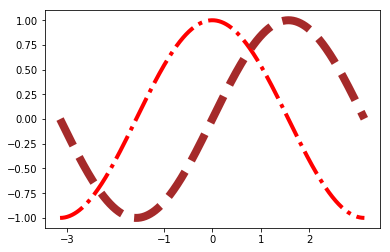

In [42]:
plt.plot(x, y, c='red', lw=4, ls='-.')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--')
plt.xticks([-3, -1, 0, 1, 2 ])
plt.show()

## Setting tick labels

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

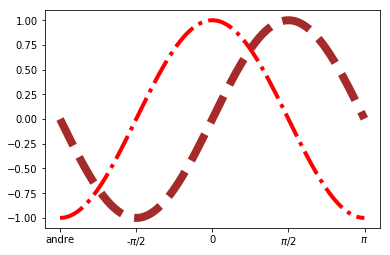

In [44]:
plt.plot(x, y, c='red', lw=4, ls='-.')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--')
plt.xticks(ticks=np.arange(-np.pi, np.pi+1, np.pi/2), 
           labels=['andre', '-$\pi/2$', '0','$\pi/2$', '$\pi$'])


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

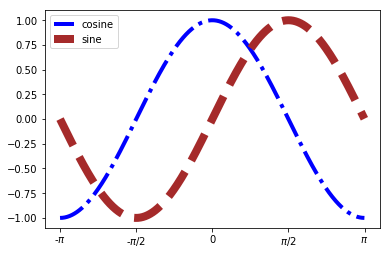

In [45]:
plt.plot(x, y, c='blue', lw=4, ls='-.', label='cosine')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--', label='sine')
plt.xticks(ticks=np.arange(-np.pi, np.pi+1, np.pi/2), 
           labels=['-$\pi$', '-$\pi/2$', '0','$\pi/2$', '$\pi$'])

plt.legend()
plt.show()

### Limits for x and y-axis.

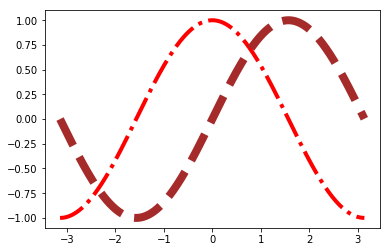

In [47]:
plt.plot(x, y, c='red', lw=4, ls='-.')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--')
plt.show()

([<matplotlib.axis.XTick at 0x21af3d800b8>,
 <a list of 2 Text xticklabel objects>)

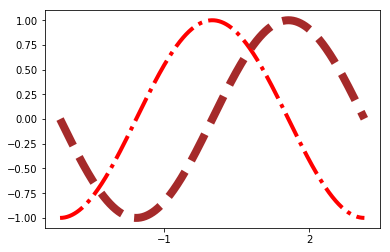

In [58]:
plt.plot(x, y, c='red', lw=4, ls='-.')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--')
plt.xticks(ticks=[-1, 2]) 
#           labels=['-$\pi$', '-$\pi/2$', '0','$\pi/2$', '$\pi$'])

([<matplotlib.axis.XTick at 0x21af2c36240>,
 <a list of 2 Text xticklabel objects>)

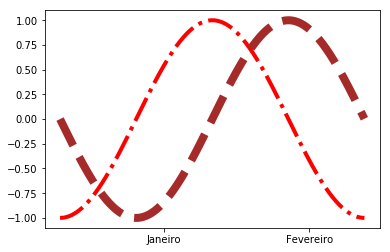

In [59]:
plt.plot(x, y, c='red', lw=4, ls='-.')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--')
plt.xticks(ticks=[-1, 2], labels=['Janeiro','Fevereiro'])

(-10, 20)

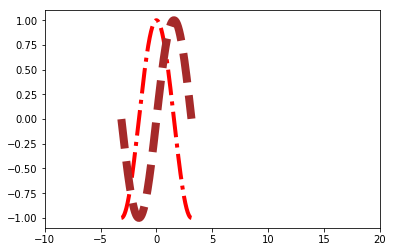

In [54]:
plt.plot(x, y, c='red', lw=4, ls='-.')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--')
plt.xlim([-10, 20])
#           labels=['-$\pi$', '-$\pi/2$', '0','$\pi/2$', '$\pi$'])

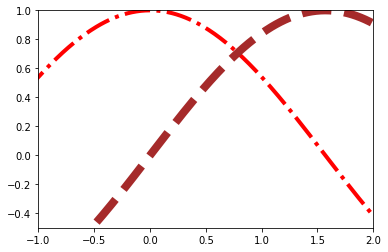

In [50]:
plt.plot(x, y, c='red', lw=4, ls='-.', label='cosine')
plt.plot(x, z, color='brown', linewidth=8, linestyle='--', label='sine')

plt.xlim([-1,2])
plt.ylim([-.5, 1]);

## Playing with line-styles and markers

In [60]:
random_array = np.random.randn(20)

<IPython.core.display.Javascript object>

In [61]:
random_array

array([ 0.58302359,  0.41092187, -0.33470804,  1.89778472, -1.03450925,
       -0.65954087, -2.65063821,  0.4245309 , -0.72354812,  0.60848254,
        0.17652897, -0.8583574 ,  0.19026337, -0.37416643, -1.29241554,
       -0.92720741, -1.65219974,  0.50638273, -0.35150476, -0.02463584])

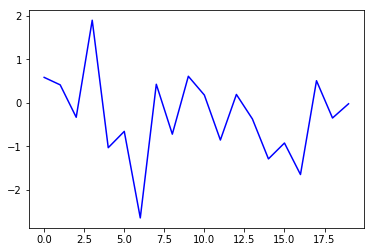

In [63]:
plt.plot(random_array, 
         color='blue')

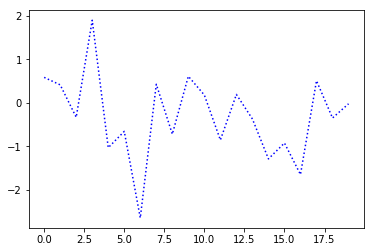

In [64]:
plt.plot(random_array, 
         color='blue', 
         linestyle=':')

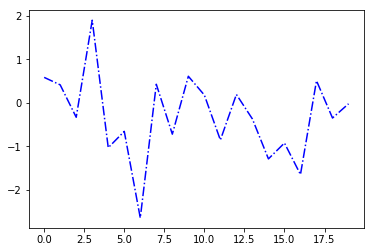

In [65]:
plt.plot(random_array, 
         color='blue', 
         linestyle='-.')

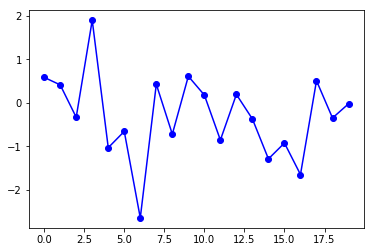

In [66]:
plt.plot(random_array, 
         color='blue', 
         marker='o')

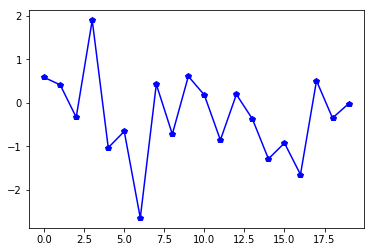

In [67]:
plt.plot(random_array,
         color='blue', 
         marker = 'p')

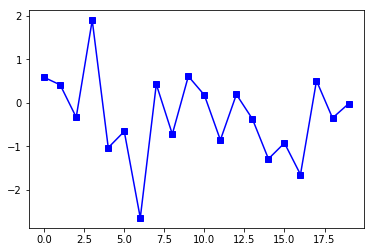

In [69]:
plt.plot(random_array,
         color='blue', 
         marker = 's')

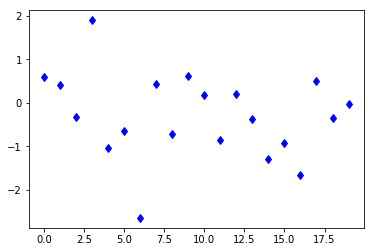

In [70]:
plt.plot(random_array,
         color='blue', 
         marker='d',
         linestyle = 'None')

## Scatter Plot - x vs y plot

Similar to the plot above but you need to specify the x coordinates

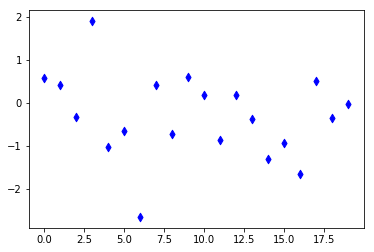

In [72]:
plt.scatter(x = range(0,20),
            y = random_array,
            color='blue', 
            marker = 'd')

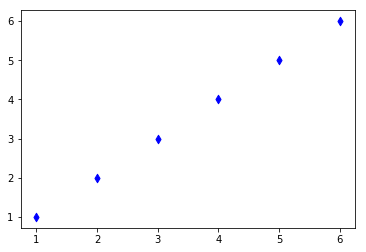

In [73]:
plt.scatter([1,2,3,4,5,6],
            [1,2,3,4,5,6],
            color='blue', 
            marker = 'd')

# Types of Charts

In [74]:
df = pd.read_csv('data/exams.csv')
df.columns = [col.replace(' ', '_').replace('/','_') for col in df.columns]

<IPython.core.display.Javascript object>

In [75]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,some high school,free/reduced,none,69,61,58
1,female,group C,some college,free/reduced,completed,47,65,69
2,male,group A,high school,standard,none,66,52,53
3,male,group B,some college,standard,none,88,89,82
4,female,group C,master's degree,free/reduced,none,62,82,76


In [76]:
df.shape

(100, 8)

In [77]:
x = df['math_score']
y = df['writing_score']

## Scatterplot

Text(0, 0.5, 'Writing scores')

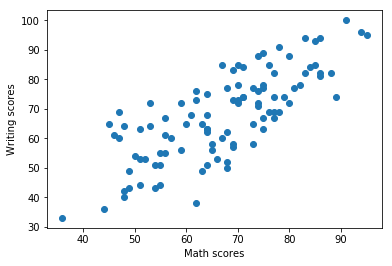

In [78]:
plt.scatter(x,y)
plt.xlabel('Math scores')
plt.ylabel('Writing scores')

Text(0, 0.5, 'Writing scores')

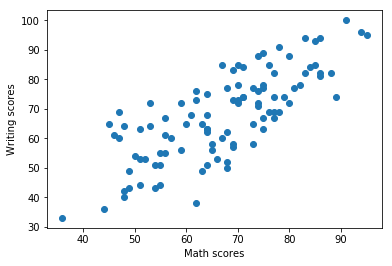

In [80]:
plt.scatter(df['math_score'], df['writing_score'])
plt.xlabel('Math scores')
plt.ylabel('Writing scores')

Text(0, 0.5, 'Writing scores')

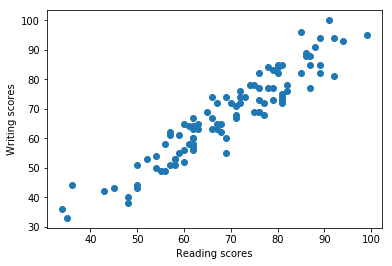

In [81]:
plt.scatter(df['reading_score'], df['writing_score'])
plt.xlabel('Reading scores')
plt.ylabel('Writing scores')

In [82]:
import seaborn as sns

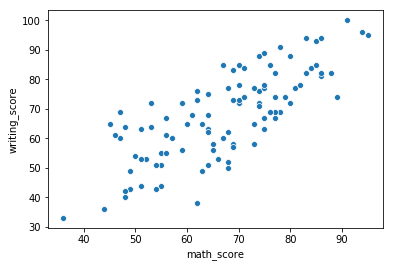

In [83]:
sns.scatterplot(x, y)

In [84]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,some high school,free/reduced,none,69,61,58
1,female,group C,some college,free/reduced,completed,47,65,69


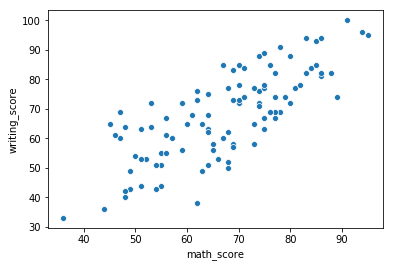

In [85]:
sns.scatterplot(df['math_score'], df['writing_score'])

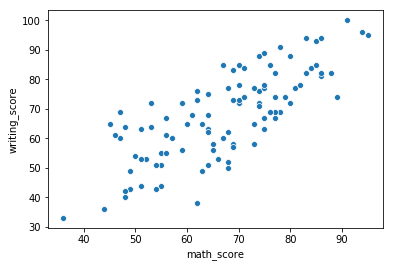

In [86]:
sns.scatterplot(df.math_score, df.writing_score)

## HUE

Separate the data by group of colors

In [87]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,some high school,free/reduced,none,69,61,58
1,female,group C,some college,free/reduced,completed,47,65,69


In [88]:
men = df.query('gender == "male"')

In [90]:
women = df.query('gender == "female"')

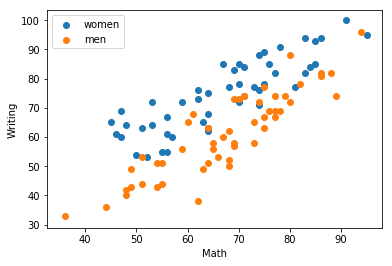

In [95]:
plt.scatter(women['math_score'], women['writing_score'], label='women')
plt.scatter(men['math_score'], men['writing_score'], label='men')

plt.xlabel('Math')
plt.ylabel('Writing')
plt.legend()

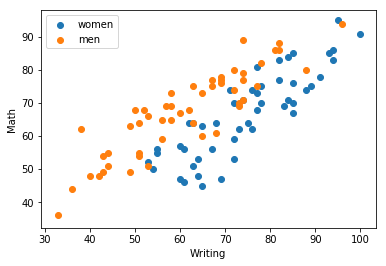

In [97]:
plt.scatter(women['writing_score'], women['math_score'], label='women')
plt.scatter(men['writing_score'], men['math_score'], label='men')

plt.xlabel('Writing')
plt.ylabel('Math')
plt.legend()

In [ ]:
men = df.query('gender == "male"')
women = df.query('gender == "female"')

plt.scatter(men.math_score, men.writing_score)
plt.scatter(women.math_score, women.writing_score)

plt.legend(['men', 'women'])
plt.xlabel('Math')
plt.ylabel('Writing')

In [ ]:
df.head(2)

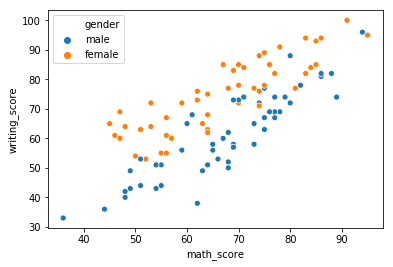

In [98]:
sns.scatterplot(df.math_score, df.writing_score, hue=df.gender)

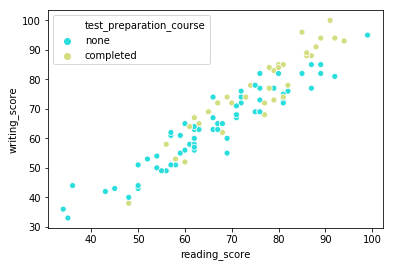

In [109]:
sns.scatterplot(df.reading_score, df.writing_score, hue=df.test_preparation_course, palette='rainbow')

### Using strings and passing the `data` argument

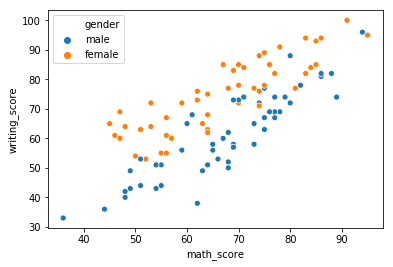

In [112]:
# sns.scatterplot(df.math_score, df.writing_score, hue=df.gender)
sns.scatterplot('math_score', 'writing_score', hue='gender', data=df)

## LinePlot

In [113]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,some high school,free/reduced,none,69,61,58
1,female,group C,some college,free/reduced,completed,47,65,69


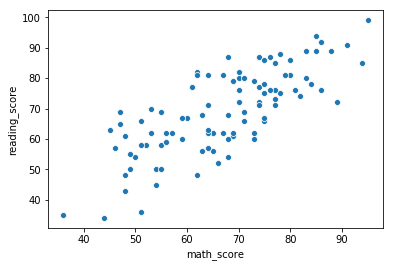

In [116]:
sns.scatterplot(df.math_score, df.reading_score,)

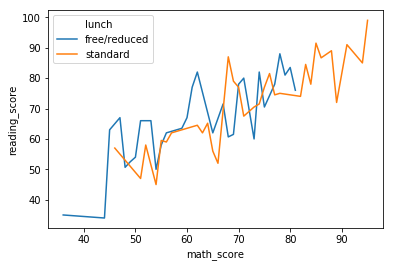

In [118]:
sns.lineplot(df.math_score, df.reading_score, hue=df.lunch, ci=None)

## Regplot

Plot linear regression line. 

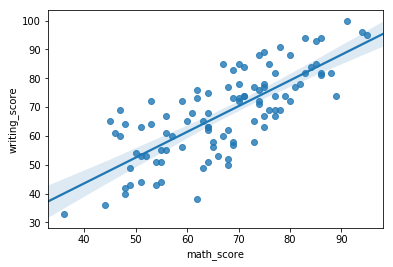

In [119]:
sns.regplot(x, y)

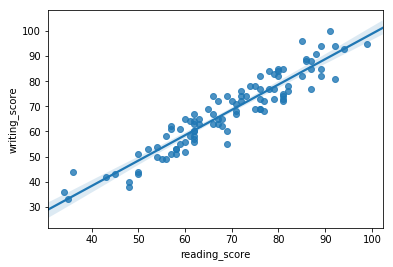

In [120]:
sns.regplot(df.reading_score, df.writing_score)

## Boxplot

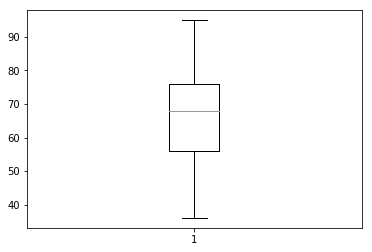

In [121]:
plt.boxplot(x)
plt.show()

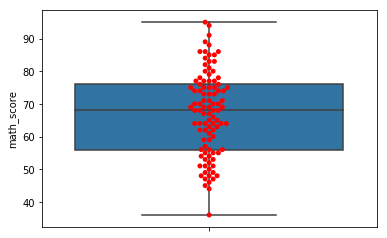

In [126]:
sns.boxplot(y=x)
sns.swarmplot(y=x, color='red')

# conclusões com boxplot: 


In [127]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,some high school,free/reduced,none,69,61,58
1,female,group C,some college,free/reduced,completed,47,65,69


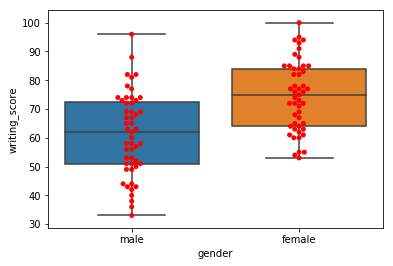

In [134]:
sns.boxplot(x='gender', y='writing_score', data=df)

sns.swarmplot(x='gender', y='writing_score', data=df, color='red')

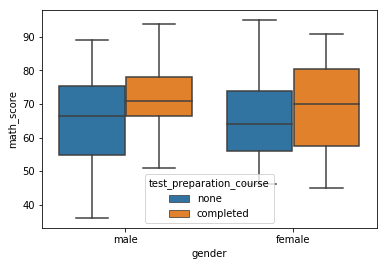

In [133]:
sns.boxplot(x='gender', y='math_score', data=df, hue='test_preparation_course')

## Violing Plot

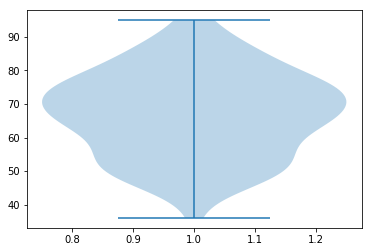

In [135]:
plt.violinplot(x)
plt.show()

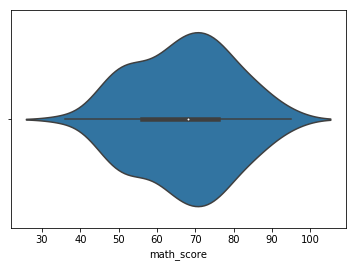

In [136]:
sns.violinplot(x)

## Histogram

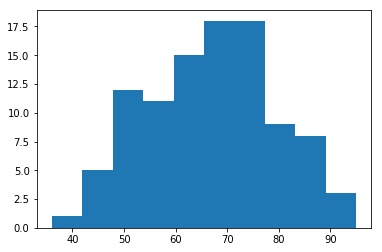

In [137]:
plt.hist(x)
plt.show()

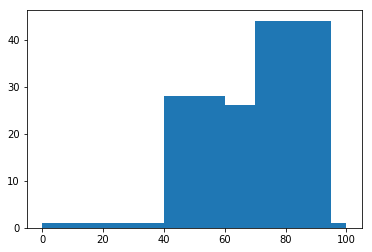

In [145]:
plt.hist(x, bins=[0, 40, 60, 70, 95, 100])
plt.show()

## KDE distribution plot (Kernel Density Estimation)

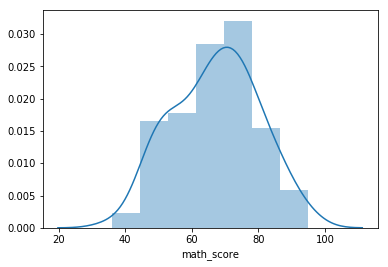

In [146]:
sns.distplot(x)

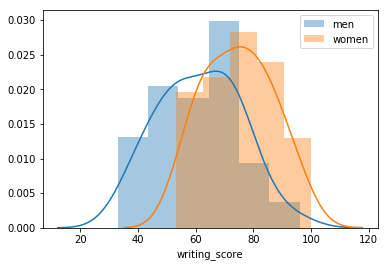

In [149]:
sns.distplot(men.writing_score, label='men')
sns.distplot(women.writing_score, label='women')
plt.legend()

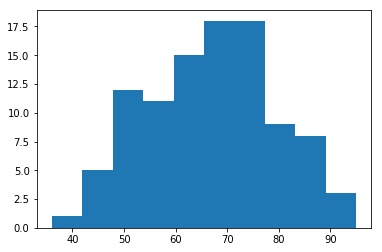

In [150]:
plt.hist(x)
plt.show()

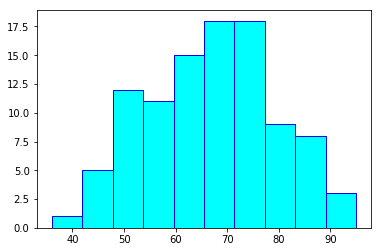

In [151]:
plt.hist(x, facecolor='cyan', edgecolor='blue', )
plt.show()

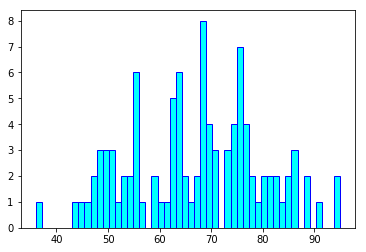

In [152]:
plt.hist(x, facecolor='cyan', edgecolor='blue', bins=50 )
plt.show()

## Correlation Heatmap

In [153]:
df.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.769570,0.768598
reading_score,0.769570,1.000000,0.940687
writing_score,0.768598,0.940687,1.000000


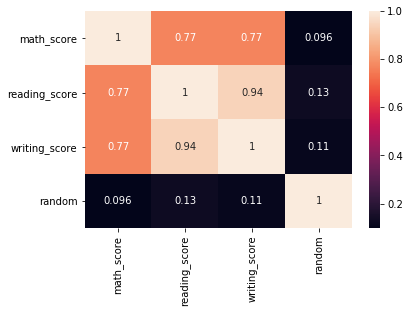

In [158]:
sns.heatmap(df.corr(), annot=True)

In [155]:
df['random'] = np.random.random(size=len(df))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

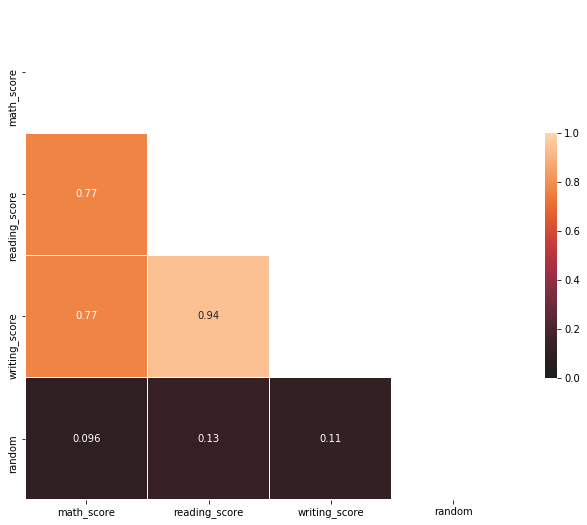

In [159]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True)